In [362]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Time Series Data

In [61]:
chartevents = pd.read_csv('../data/mimic/ALPACA_CHARTEVENTS.csv')
display(chartevents)

C:\Users\owner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,9,12,13,16,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ITEMID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,...,STOPPED,ROW_ID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,220045,2092,105566,219295,2187-10-03 17:00:00,2187-10-03 17:24:00,19561.0,64,64.0,bpm,...,NaN,12712,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN
1,220045,2092,105566,219295,2187-10-03 18:00:00,2187-10-03 18:22:00,16609.0,67,67.0,bpm,...,NaN,12712,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN
2,220045,2092,105566,219295,2187-10-03 19:00:00,2187-10-03 23:40:00,15075.0,62,62.0,bpm,...,NaN,12712,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN
3,220045,2092,105566,219295,2187-10-01 01:00:00,2187-10-01 03:22:00,15075.0,66,66.0,bpm,...,NaN,12712,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN
4,220045,2092,105566,219295,2187-10-01 02:00:00,2187-10-01 03:22:00,15075.0,62,62.0,bpm,...,NaN,12712,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929933,227969,99495,129645,229870,2195-07-08 12:31:00,2195-07-08 12:32:00,15286.0,Oriented by RN,NaN,NaN,...,NaN,15067,Safety Measures_U_1,Safety Measures_U_1,metavision,chartevents,Restraint/Support Systems,NaN,Text,NaN
1929934,227969,99495,129645,229870,2195-07-08 12:31:00,2195-07-08 12:32:00,15286.0,Pain evaluated and treated,NaN,NaN,...,NaN,15067,Safety Measures_U_1,Safety Measures_U_1,metavision,chartevents,Restraint/Support Systems,NaN,Text,NaN
1929935,227969,99495,129645,229870,2195-07-07 04:00:00,2195-07-07 05:11:00,15709.0,Adequate lighting,NaN,NaN,...,NaN,15067,Safety Measures_U_1,Safety Measures_U_1,metavision,chartevents,Restraint/Support Systems,NaN,Text,NaN
1929936,227969,99495,129645,229870,2195-07-07 22:00:00,2195-07-07 22:02:00,15709.0,Adequate lighting,NaN,NaN,...,NaN,15067,Safety Measures_U_1,Safety Measures_U_1,metavision,chartevents,Restraint/Support Systems,NaN,Text,NaN


In [62]:
chartpatients = list(chartevents['ICUSTAY_ID'].drop_duplicates())
print(len(chartpatients))

257


In [83]:
chartlabels = list(chartevents['LABEL'].drop_duplicates())
for c in chartlabels:
    print(c)

Heart Rate
Heart rate Alarm - High
Heart Rate Alarm - Low
Non Invasive Blood Pressure systolic
Non Invasive Blood Pressure diastolic
Non Invasive Blood Pressure mean
Respiratory Rate
Arterial O2 pressure
Arterial O2 Saturation
Hemoglobin
Arterial CO2 Pressure
PH (Venous)
O2 saturation pulseoxymetry
Minute Volume Alarm - Low
Minute Volume Alarm - High
PEEP set
Hematocrit (serum)
WBC
AST
Chloride (serum)
Creatinine
Glucose (serum)
LDH
Magnesium
ALT
Sodium (serum)
PH (dipstick)
TCO2 (calc) Venous
Non-Invasive Blood Pressure Alarm - High
Non-Invasive Blood Pressure Alarm - Low
Temperature Fahrenheit
O2 Saturation Pulseoxymetry Alarm - High
O2 Saturation Pulseoxymetry Alarm - Low
PH (Arterial)
Inspired O2 Fraction
Inspired Gas Temp.
Paw High
Vti High
Fspn High
Apnea Interval
Resp Alarm - High
Resp Alarm - Low
MDI #1 Puff
MDI #2 Puff
Cuff Pressure
Cuff Volume (mL)
Impaired Skin Length #1
Daily Weight
Tidal Volume (set)
Tidal Volume (observed)
Tidal Volume (spontaneous)
Minute Volume
Respirat

In [66]:
heartrate = chartevents[chartevents['ABBREVIATION'] == 'HR']
x = heartrate['ICUSTAY_ID'].drop_duplicates()
print(len(x))

122


In [68]:
patients = pd.read_csv('../data/mimic/alpaca_icu_stay_ids.csv')
display(patients)

,Unnamed: 0,ICUSTAY_ID
0,0,271668
1,1,261797
2,2,290619
3,3,271364
4,4,219295
...,...,...
255,255,275659
256,256,272040
257,257,261665
258,258,297206


In [5]:
hr = pd.read_csv('../data/mimic/hr_alpaca.csv')
mean = pd.read_csv('../data/mimic/mean_alpaca.csv')
sys = pd.read_csv('../data/mimic/sys_alpaca.csv')
dias = pd.read_csv('../data/mimic/dias_alpaca.csv')
sao2 = pd.read_csv('../data/mimic/sao2_alpaca.csv')
resp = pd.read_csv('../data/mimic/resp_alpaca.csv')

In [16]:
hr = hr.sort_values(by=['ICUSTAY_ID', 'offset'])
mean = mean.sort_values(by=['ICUSTAY_ID', 'offset'])
sys = sys.sort_values(by=['ICUSTAY_ID', 'offset'])
dias = dias.sort_values(by=['ICUSTAY_ID', 'offset'])
sao2 = sao2.sort_values(by=['ICUSTAY_ID', 'offset'])
resp = resp.sort_values(by=['ICUSTAY_ID', 'offset'])

display(hr)
display(mean)

ts_data = hr.merge(mean, on=['ICUSTAY_ID', 'offset'], how='outer').merge(sys, on=['ICUSTAY_ID', 'offset'], how='outer').merge(dias, on=['ICUSTAY_ID', 'offset'], how='outer').merge(sao2, on=['ICUSTAY_ID', 'offset'], how='outer').merge(resp, on=['ICUSTAY_ID', 'offset'], how='outer')
print(ts_data.shape)
display(ts_data)

,ICUSTAY_ID,offset,hr
4409,205108,3,NaN
4410,205108,8,NaN
4411,205108,13,NaN
4412,205108,18,NaN
4413,205108,23,NaN
...,...,...,...
30836,298417,5543,115.983931
30837,298417,5548,118.083574
30838,298417,5553,116.216707
30839,298417,5558,NaN


,ICUSTAY_ID,offset,mean
4409,205108,3,NaN
4410,205108,8,NaN
4411,205108,13,NaN
4412,205108,18,NaN
4413,205108,23,NaN
...,...,...,...
30836,298417,5543,NaN
30837,298417,5548,NaN
30838,298417,5553,NaN
30839,298417,5558,NaN


(63356, 8)


,ICUSTAY_ID,offset,hr,mean,sys,dias,sao2,resp
0,205108,3,NaN,NaN,NaN,NaN,NaN,NaN
1,205108,8,NaN,NaN,NaN,NaN,NaN,NaN
2,205108,13,NaN,NaN,NaN,NaN,NaN,NaN
3,205108,18,NaN,NaN,NaN,NaN,NaN,NaN
4,205108,23,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
63351,298417,5543,115.983931,NaN,NaN,NaN,94.000385,19.149924
63352,298417,5548,118.083574,NaN,NaN,NaN,94.783644,19.799786
63353,298417,5553,116.216707,NaN,NaN,NaN,94.700055,19.949589
63354,298417,5558,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Saving to csv
ts_data.to_csv('../data/mimic/ts_data.csv')

In [70]:
patients = pd.DataFrame(ts_data['ICUSTAY_ID'].drop_duplicates())

# Demographic

In [367]:
icustays = pd.read_csv('../data/mimic/physionet.org/files/mimiciii/1.4/ICUSTAYS.csv')
dem = pd.read_csv('../data/mimic/physionet.org/files/mimiciii/1.4/PATIENTS.csv')
print(dem.shape)
dem = dem.merge(pd.DataFrame(icustays), on='SUBJECT_ID')
print(dem.shape)
dem = dem.merge(patients, on='ICUSTAY_ID')
print(dem.shape)
display(dem)

# Getting admission time
admission = pd.read_csv('../data/mimic/physionet.org/files/mimiciii/1.4/ADMISSIONS.csv')
admission = admission.merge(pd.DataFrame(icustays[['ICUSTAY_ID', 'SUBJECT_ID']])).merge(patients, on='ICUSTAY_ID')
display(admission)

# Getting height
inputevents_mv = pd.read_csv('../data/mimic/physionet.org/files/mimiciii/1.4/INPUTEVENTS_MV.csv')
inputevents_mv = inputevents_mv.merge(patients, on='ICUSTAY_ID')
display(inputevents_mv)

(46520, 8)
(61532, 19)
(57, 19)


,ROW_ID_x,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID_y,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,2146,2265,M,2049-08-25 00:00:00,2126-05-24 00:00:00,2126-05-24 00:00:00,2126-05-24 00:00:00,1,2858,147742,268848,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
1,4907,5175,M,2107-03-21 00:00:00,2184-07-19 00:00:00,NaN,2184-07-19 00:00:00,1,6577,107641,267269,carevue,MICU,MICU,15,15,2184-02-24 01:45:00,2184-02-24 13:16:00,0.4799
2,9459,9998,M,2114-12-21 00:00:00,2173-06-15 00:00:00,2173-06-15 00:00:00,2173-06-14 00:00:00,1,12733,144947,269831,carevue,TSICU,TSICU,33,33,2173-06-11 11:42:16,2173-06-15 00:56:43,3.5517
3,12972,13716,M,2075-03-13 00:00:00,NaN,NaN,NaN,0,17452,180329,233474,carevue,TSICU,TSICU,57,57,2130-10-25 20:44:34,2130-11-02 12:49:45,7.6703
4,36732,62497,F,1881-01-16 00:00:00,2181-01-20 00:00:00,2181-01-20 00:00:00,2181-01-20 00:00:00,1,48981,198653,236628,metavision,SICU,SICU,33,33,2181-01-16 18:33:47,2181-01-20 14:50:05,3.8447
5,33382,49881,F,2148-08-17 00:00:00,NaN,NaN,NaN,0,44621,123652,276304,metavision,TSICU,TSICU,14,14,2171-03-16 04:04:39,2171-03-17 17:08:09,1.5441
6,39921,74677,M,2128-11-06 00:00:00,NaN,NaN,NaN,0,53052,189016,280741,metavision,CSRU,CSRU,12,12,2191-04-22 09:53:30,2191-04-23 14:41:24,1.1999
7,31080,41061,F,2055-07-06 00:00:00,NaN,NaN,NaN,0,41688,158086,232235,metavision,TSICU,TSICU,14,14,2112-11-20 11:18:35,2112-11-22 13:26:32,2.0889
8,36940,63220,M,2088-01-01 00:00:00,NaN,NaN,NaN,0,49247,161554,279145,metavision,SICU,SICU,33,33,2114-08-31 02:30:57,2114-09-01 17:20:15,1.6176
9,37233,64287,M,2070-01-03 00:00:00,NaN,NaN,NaN,0,49612,185155,281655,metavision,TSICU,TSICU,14,14,2118-04-10 00:26:48,2118-04-11 15:00:56,1.6070


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ICUSTAY_ID
0,2741,2265,147742,2125-09-27 05:36:00,2125-10-26 13:28:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,NaN,CATHOLIC,MARRIED,WHITE,2125-09-27 04:18:00,2125-09-27 06:15:00,HEAD TRAUMA,0,1,268848
1,2742,2265,100548,2125-10-31 19:35:00,2125-11-14 12:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,NaN,CATHOLIC,MARRIED,WHITE,2125-10-31 10:50:00,2125-10-31 19:50:00,SUBDURAL HEMATOMA,0,1,268848
2,2743,2265,126904,2125-11-28 17:50:00,2125-12-12 12:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,NaN,CATHOLIC,MARRIED,WHITE,2125-11-28 15:10:00,2125-11-28 19:04:00,SEPSIS;METHICILLIN RESISTANT STAPH AUREUS;VANC...,0,1,268848
3,2744,2265,118662,2125-12-13 19:32:00,2126-01-06 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,NaN,CATHOLIC,MARRIED,WHITE,2125-12-13 16:07:00,2125-12-13 20:53:00,PNEUMONIA;TELEMETRY,0,1,268848
4,2745,2265,134020,2126-01-21 01:39:00,2126-04-26 15:10:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2126-01-20 16:53:00,2126-01-21 03:14:00,FEVER,0,1,268848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,56500,92283,104872,2156-07-16 20:01:00,2156-07-20 13:20:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,UNOBTAINABLE,MARRIED,WHITE,2156-07-16 17:20:00,2156-07-16 21:07:00,POLYTRAUMA,0,1,283385
82,56348,91798,135873,2195-11-12 20:06:00,2195-11-23 14:46:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,Private,ENGL,NOT SPECIFIED,MARRIED,PATIENT DECLINED TO ANSWER,2195-11-12 17:54:00,2195-11-12 21:00:00,POLYTRAUMA,0,1,261665
83,57739,96171,102997,2145-10-16 18:22:00,2145-10-25 15:28:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,UNOBTAINABLE,NaN,UNKNOWN/NOT SPECIFIED,2145-10-16 15:51:00,2145-10-16 18:25:00,POLYTRAUMA,0,1,273266
84,58258,97706,163893,2149-05-28 04:19:00,2149-06-02 13:05:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Self Pay,ENGL,NOT SPECIFIED,SINGLE,OTHER,2149-05-28 03:49:00,2149-05-28 05:53:00,MULTIPLE TRAUMA;S/P MOTOR VEHICLE ACCIDENT,0,1,287088


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,...,TOTALAMOUNTUOM,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE,ORIGINALAMOUNT,ORIGINALRATE
0,487306,21706,108890,267375.0,2116-01-24 10:12:00,2116-01-24 10:13:00,223258,6.000000,units,NaN,...,NaN,0,0,0,FinishedRunning,NaN,NaN,NaN,6.0,6.00000
1,487307,21706,108890,267375.0,2116-01-24 10:49:00,2116-01-24 12:26:00,225825,999.999966,ml,618.556680,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,1000.0,618.55670
2,487308,21706,108890,267375.0,2116-01-24 16:45:00,2116-01-24 17:51:00,225825,82.500000,ml,75.000000,...,ml,0,0,0,Stopped,NaN,NaN,NaN,1000.0,75.00000
3,487309,21706,108890,267375.0,2116-01-25 16:00:00,2116-01-25 16:01:00,226452,900.000000,ml,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,900.0,900.00000
4,487310,21706,108890,267375.0,2116-01-24 20:32:00,2116-01-24 20:33:00,226452,240.000000,ml,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,240.0,240.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,3577094,60716,126985,205108.0,2133-09-10 02:31:00,2133-09-10 12:27:00,225828,1000.000030,ml,100.671144,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,1000.0,100.67113
9741,3577095,60716,126985,205108.0,2133-09-09 22:30:00,2133-09-09 22:31:00,228315,1000.000000,mg,NaN,...,NaN,0,0,0,FinishedRunning,NaN,NaN,NaN,1000.0,999.99994
9742,3577096,60716,126985,205108.0,2133-09-09 16:36:00,2133-09-09 16:37:00,226361,1000.000000,ml,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,1000.0,1000.00000
9743,3577097,60716,126985,205108.0,2133-09-09 16:36:00,2133-09-10 02:36:00,225828,999.999960,ml,99.999996,...,ml,0,0,2,Rewritten,RN,NaN,2133-09-10 04:09:00,1000.0,100.00000


In [180]:
demographic = dem.merge(admission[['ADMITTIME', 'ICUSTAY_ID']], how='outer').merge(inputevents_mv[['PATIENTWEIGHT', 'ICUSTAY_ID']], how='outer')
yr_ob = list(demographic['DOB'])
yr_ob = [int(i[0:4]) for i in yr_ob]
yr_admit = list(demographic['INTIME'])
yr_admit = [int(i[0:4]) for i in yr_admit]
age = [yr_admit[i] - yr_ob[i] for i in range(len(yr_ob))]

newage = []
for i in range(len(age)):
    if age[i] > 89:
        newage.append(90)
    else:
        newage.append(age[i])
demographic['AGE'] = newage

gender = demographic['GENDER']
newgender = []
for i in range(len(gender)):
    if gender[i] == "F":
        newgender.append(-1)
    elif gender[i] == "M":
        newgender.append(1)
    else:
        newgender.append(0)

demographic['GENDER'] = newgender
        
demographic = demographic[['SUBJECT_ID', 'ICUSTAY_ID', 'AGE', 'PATIENTWEIGHT', 'GENDER']].drop_duplicates(subset='ICUSTAY_ID')
demographic = demographic.drop(columns = 'SUBJECT_ID')
demographic = demographic.rename(columns={"ICUSTAY_ID": "patientunitstayid", "AGE": "age", "PATIENTWEIGHT": "admissionweight", "GENDER": "gender"})

display(demographic)
print(demographic.shape)

,patientunitstayid,age,admissionweight,gender
0,268848,76,NaN,1
5,267269,77,NaN,1
6,269831,59,NaN,1
8,233474,55,NaN,1
9,236628,90,65.0,-1
359,276304,23,60.0,-1
450,280741,63,86.2,1
560,232235,57,86.0,-1
671,279145,26,86.0,1
688,281655,48,113.1,1


(57, 4)


In [181]:
demographic.to_csv('../data/mimic/processed/MIMIC_dem.csv')

# Lab

In [321]:
labevents = pd.read_csv('../data/mimic/physionet.org/files/mimiciii/1.4/LABEVENTS.csv')
d_labitems = pd.read_csv('../data/mimic/physionet.org/files/mimiciii/1.4/D_LABITEMS.csv')

In [322]:
display(labevents)
display(d_labitems)

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [323]:
lab = labevents.merge(d_labitems, on='ITEMID')
display(lab)

,ROW_ID_x,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,LABEL,FLUID,CATEGORY,LOINC_CODE
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN,21,pH,Blood,Blood Gas,11558-4
1,289,3,NaN,50820,2101-10-12 18:17:00,7.42,7.42,units,NaN,21,pH,Blood,Blood Gas,11558-4
2,396,3,NaN,50820,2101-10-15 12:42:00,7.49,7.49,units,NaN,21,pH,Blood,Blood Gas,11558-4
3,976,3,145834.0,50820,2101-10-22 04:31:00,7.40,7.40,units,NaN,21,pH,Blood,Blood Gas,11558-4
4,989,3,145834.0,50820,2101-10-22 07:13:00,7.37,7.37,units,NaN,21,pH,Blood,Blood Gas,11558-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854050,27701184,98573,175201.0,51169,2196-01-13 18:31:00,0,0.00,%,NaN,369,CD20 %,Blood,Hematology,NaN
27854051,27700707,98573,175201.0,51170,2196-01-09 03:00:00,13,13.00,#/uL,NaN,370,CD20 Absolute Count,Blood,Hematology,NaN
27854052,27699600,98573,175201.0,51170,2195-12-31 10:15:00,2,2.00,#/uL,NaN,370,CD20 Absolute Count,Blood,Hematology,NaN
27854053,27701604,98573,175201.0,51170,2196-01-19 17:22:00,0,0.00,#/uL,NaN,370,CD20 Absolute Count,Blood,Hematology,NaN


In [324]:
lab_labels = list(lab['LABEL'].drop_duplicates())
for l in lab_labels:
    print(l)

pH
SPECIMEN TYPE
Base Excess
Calculated Total CO2
Free Calcium
Intubated
Lactate
pCO2
pO2
Temperature
Anion Gap
Bicarbonate
Calcium, Total
Chloride
Creatinine
Glucose
Magnesium
Phosphate
Potassium
Sodium
Urea Nitrogen
Vancomycin
Hematocrit
Alanine Aminotransferase (ALT)
Asparate Aminotransferase (AST)
Creatine Kinase (CK)
Anisocytosis
Basophils
Eosinophils
Hemoglobin
Hypochromia
Lymphocytes
Macrocytes
MCH
MCHC
MCV
Microcytes
Monocytes
Neutrophils
Platelet Count
Poikilocytosis
RDW
Red Blood Cell Fragments
Red Blood Cells
White Blood Cells
Bilirubin
Blood
Ketone
Leukocytes
Nitrite
Protein
Specific Gravity
Urine Appearance
Urine Color
Urobilinogen
Bacteria
Epithelial Cells
Hyaline Casts
RBC
Urine Mucous
WBC
Yeast
Creatine Kinase, MB Isoenzyme
Troponin I
Alkaline Phosphatase
Bilirubin, Total
PTT
Oxygen
Oxygen Saturation
PEEP
Tidal Volume
Ventilation Rate
Ventilator
Hematocrit, Calculated
INR(PT)
PT
Albumin
Amylase
Lipase
Uric Acid
Fibrinogen, Functional
Potassium, Whole Blood
Alveolar-arte

In [325]:
lab = lab.merge(icustays, on='HADM_ID').merge(patients, on='ICUSTAY_ID')
display(lab)

,ROW_ID_x,SUBJECT_ID_x,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,...,SUBJECT_ID_y,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,1437849,2265,147742.0,50820,2125-10-02 20:16:00,7.45,7.45,units,NaN,21,...,2265,268848,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
1,1437880,2265,147742.0,50820,2125-10-03 02:52:00,7.44,7.44,units,NaN,21,...,2265,268848,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
2,1437893,2265,147742.0,50820,2125-10-03 10:41:00,7.47,7.47,units,abnormal,21,...,2265,268848,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
3,1437934,2265,147742.0,50820,2125-10-04 01:19:00,7.43,7.43,units,NaN,21,...,2265,268848,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
4,1437944,2265,147742.0,50820,2125-10-04 08:15:00,7.43,7.43,units,NaN,21,...,2265,268848,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20309,27045494,93560,140159.0,51274,2156-06-14 01:05:00,12.3,12.30,sec,NaN,474,...,93560,288285,metavision,SICU,SICU,33,33,2156-06-11 21:02:44,2156-06-14 21:07:50,3.0035
20310,27045458,93560,140159.0,51143,2156-06-13 05:25:00,0,0.00,%,NaN,343,...,93560,288285,metavision,SICU,SICU,33,33,2156-06-11 21:02:44,2156-06-14 21:07:50,3.0035
20311,27045459,93560,140159.0,51144,2156-06-13 05:25:00,0,0.00,%,NaN,344,...,93560,288285,metavision,SICU,SICU,33,33,2156-06-11 21:02:44,2156-06-14 21:07:50,3.0035
20312,27045468,93560,140159.0,51251,2156-06-13 05:25:00,1,1.00,%,abnormal,451,...,93560,288285,metavision,SICU,SICU,33,33,2156-06-11 21:02:44,2156-06-14 21:07:50,3.0035


In [326]:
icustart = pd.DataFrame(lab['INTIME'].astype('datetime64'))
datetimes = pd.DataFrame(lab['CHARTTIME'].astype('datetime64'))

display(icustart)
display(datetimes)

,INTIME
0,2125-09-27 05:37:17
1,2125-09-27 05:37:17
2,2125-09-27 05:37:17
3,2125-09-27 05:37:17
4,2125-09-27 05:37:17
...,...
20309,2156-06-11 21:02:44
20310,2156-06-11 21:02:44
20311,2156-06-11 21:02:44
20312,2156-06-11 21:02:44


,CHARTTIME
0,2125-10-02 20:16:00
1,2125-10-03 02:52:00
2,2125-10-03 10:41:00
3,2125-10-04 01:19:00
4,2125-10-04 08:15:00
...,...
20309,2156-06-14 01:05:00
20310,2156-06-13 05:25:00
20311,2156-06-13 05:25:00
20312,2156-06-13 05:25:00


In [327]:
difftest = ((datetimes['CHARTTIME']-(icustart['INTIME'])).dt.seconds/60).astype(int)
display(difftest)

0         878
1        1274
2         303
3        1181
4         157
         ... 
20309     242
20310     502
20311     502
20312     502
20313     502
Length: 20314, dtype: int32

In [328]:
lab['offset'] = difftest
lab = lab.sort_values(by=['ICUSTAY_ID', 'offset'])
display(lab)

,ROW_ID_x,SUBJECT_ID_x,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,...,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,offset
6797,22759566,60716,126985.0,51221,2133-09-09 16:34:00,42.4,42.4,%,NaN,421,...,205108,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,96
6826,22759567,60716,126985.0,51301,2133-09-09 16:34:00,9.8,9.8,K/uL,NaN,501,...,205108,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,96
6832,22759564,60716,126985.0,50867,2133-09-09 16:34:00,42,42.0,IU/L,NaN,68,...,205108,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,96
6834,22759565,60716,126985.0,50956,2133-09-09 16:34:00,50,50.0,IU/L,NaN,157,...,205108,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,96
6801,22759590,60716,126985.0,51221,2133-09-10 19:20:00,39.3,39.3,%,abnormal,421,...,205108,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,20191214,42124,158677.0,50818,2170-05-11 23:58:00,45,45.0,mm Hg,NaN,19,...,298417,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1403
5868,20191217,42124,158677.0,50821,2170-05-11 23:58:00,279,279.0,mm Hg,abnormal,22,...,298417,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1403
5870,20191218,42124,158677.0,50825,2170-05-11 23:58:00,36.7,36.7,NaN,NaN,26,...,298417,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1403
6040,20191215,42124,158677.0,50819,2170-05-11 23:58:00,5,5.0,NaN,NaN,20,...,298417,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1403


In [329]:
# lab_labels = list(lab['LABEL'].drop_duplicates())
# for l in lab_labels:
#     print(l)

In [330]:
lab_feat = ['Basophils', 'Eosinophils', 'Lymphs', 'Monos', 'Polys',
            'Alanine Aminotransferase (ALT)', 'Asparate Aminotransferase (AST)', 'BUN',
            'Base Excess', 'FiO2 Set', 'HCO3 (serum)', 'Hematocrit', 'Hemoglobin', 'MCH', 'MCHC',
            'MCV', 'O2 saturation pulseoxymetry', 'PT', 'INR(PT)', 'PTT', 'RBC', 'RDW', 'WBC',
            'Albumin', 'Alkaline Phosphate', 'Anion gap', 'Bicarbonate', 'Calcium', 'Chloride',
            'Creatinine', 'Glucose', 'Magnesium', 'pH', 'Arterial PaCO2', 'PAO2', 'Phosphate',
            'Platelets', 'Potassium', 'Sodium', 'Total Bilirubin', 'Total Protein']

cols_tokeep = ['ICUSTAY_ID', 'offset', 'LABEL', 'VALUE']

lab_new = lab[lab.columns & cols_tokeep]

lab_new = lab_new[lab_new.VALUE.apply(lambda x: x.isnumeric())]

lab_new['VALUE'] = lab_new['VALUE'].astype('float')

lab_new = lab_new[lab_new['offset'] <= 24*60]

lab_new = pd.pivot_table(lab_new, values='VALUE', index=['ICUSTAY_ID', 'offset'], columns='LABEL').reset_index()

cols_tokeep = (cols_tokeep + lab_feat)
cols_tokeep.remove('offset')
lab_new = lab_new[lab_new.columns & cols_tokeep]

lab_grouped = lab_new.groupby('ICUSTAY_ID').mean()

display(lab_grouped)
print(lab_grouped.shape)

LABEL,Alanine Aminotransferase (ALT),Asparate Aminotransferase (AST),Base Excess,Basophils,Bicarbonate,Chloride,Eosinophils,Glucose,Lymphs,MCV,Monos,PTT,Polys,RBC,Sodium,WBC
ICUSTAY_ID,,,,,,,,,,,,,,,,
205108,NaN,NaN,0.000000,NaN,28.000000,103.000000,NaN,92.000000,NaN,89.000000,NaN,NaN,NaN,NaN,139.000000,NaN
208032,9.000000,19.000000,0.214286,NaN,25.937500,102.000000,NaN,114.100000,NaN,88.000000,NaN,NaN,NaN,6.000000,137.000000,3.000000
210850,46.666667,51.666667,3.529412,NaN,24.420000,103.380000,NaN,132.700000,NaN,91.826923,NaN,NaN,NaN,NaN,137.860000,NaN
212893,15.250000,14.500000,0.000000,NaN,23.423077,108.346154,NaN,124.153846,NaN,89.000000,NaN,NaN,NaN,16.000000,139.769231,5.666667
213548,NaN,NaN,NaN,NaN,27.166667,102.166667,NaN,114.000000,NaN,85.333333,NaN,NaN,NaN,NaN,140.833333,NaN
214189,NaN,NaN,1.333333,NaN,26.111111,106.777778,0.000000,148.909091,NaN,85.222222,NaN,NaN,NaN,NaN,140.555556,NaN
219167,NaN,NaN,1.391304,NaN,26.473684,108.394737,NaN,114.250000,NaN,89.531250,2.0,NaN,74.5,8.000000,141.263158,1.000000
223071,NaN,NaN,1.750000,0.0,26.818182,101.818182,1.428571,119.441176,NaN,85.250000,NaN,NaN,NaN,1.666667,135.090909,1.750000
224306,27.500000,43.000000,2.416667,NaN,28.333333,110.733333,NaN,127.850000,NaN,92.818182,NaN,NaN,NaN,1.000000,147.466667,1.500000


(56, 16)


In [421]:
# Re-ordering and renaming columns
# TODO
lab_final = lab_grouped[['Basophils', 'Eosinophils', 'Lymphs', 'Monos', 'Polys', 'Alanine Aminotransferase (ALT)',
                         'Asparate Aminotransferase (AST)', 'Base Excess', 'MCV', 'PTT', 'RBC', 'WBC', 'Bicarbonate',
                         'Chloride', 'Glucose', 'Sodium']].reset_index()

lab_final = lab_final.rename(columns={"ICUSTAY_ID": "patientunitstayid", "Basophils": "-basos", 
                                      "Eosinophils": "-eos", "Lymphs": "-lymphs",
                                      "Monos": "-monos", "Polys": "-polys", 
                                      "Alanine Aminotransferase (ALT)": "ALT (SGPT)",
                                      "Asparate Aminotransferase (AST)": "AST (SGOT)", "WBC": "WBC x 1000",
                                      "Bicarbonate": "bicarbonate", "Chloride": "chloride", "Glucose": "glucose",
                                      "Sodium": "sodium"})

display(lab_final)
print(lab_final.shape)

lab_final.to_csv('../data/mimic/processed/MIMIC_lab.csv')

LABEL,patientunitstayid,-basos,-eos,-lymphs,-monos,-polys,ALT (SGPT),AST (SGOT),Base Excess,MCV,PTT,RBC,WBC x 1000,bicarbonate,chloride,glucose,sodium
0,205108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,89.000000,NaN,NaN,NaN,28.000000,103.000000,92.000000,139.000000
1,208032,NaN,NaN,NaN,NaN,NaN,9.000000,19.000000,0.214286,88.000000,NaN,6.000000,3.000000,25.937500,102.000000,114.100000,137.000000
2,210850,NaN,NaN,NaN,NaN,NaN,46.666667,51.666667,3.529412,91.826923,NaN,NaN,NaN,24.420000,103.380000,132.700000,137.860000
3,212893,NaN,NaN,NaN,NaN,NaN,15.250000,14.500000,0.000000,89.000000,NaN,16.000000,5.666667,23.423077,108.346154,124.153846,139.769231
4,213548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.333333,NaN,NaN,NaN,27.166667,102.166667,114.000000,140.833333
5,214189,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.333333,85.222222,NaN,NaN,NaN,26.111111,106.777778,148.909091,140.555556
6,219167,NaN,NaN,NaN,2.0,74.5,NaN,NaN,1.391304,89.531250,NaN,8.000000,1.000000,26.473684,108.394737,114.250000,141.263158
7,223071,0.0,1.428571,NaN,NaN,NaN,NaN,NaN,1.750000,85.250000,NaN,1.666667,1.750000,26.818182,101.818182,119.441176,135.090909
8,224306,NaN,NaN,NaN,NaN,NaN,27.500000,43.000000,2.416667,92.818182,NaN,1.000000,1.500000,28.333333,110.733333,127.850000,147.466667
9,232235,NaN,NaN,NaN,NaN,NaN,576.000000,447.000000,0.000000,91.500000,NaN,2.500000,4.000000,25.500000,106.000000,168.000000,137.500000


(56, 17)


# Medications / Infusions

In [398]:
prescriptions = pd.read_csv('../data/mimic/physionet.org/files/mimiciii/1.4/PRESCRIPTIONS.csv')
display(prescriptions)

C:\Users\owner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,4.690617e+08,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,5.601728e+07,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.000000e+00,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,5.482972e+07,20mg Tablet,20,mg,1,TAB,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156445,3996662,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,PredniSONE,PredniSONE,PredniSONE,PRED20,006751,5.400182e+07,20 mg Tablet,40,mg,2,TAB,PO/NG
4156446,3996070,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Ipratropium Bromide Neb,Ipratropium Bromide Neb,Ipratropium Bromide Neb,IPRA2H,021700,4.879801e+08,2.5mL Vial,1,NEB,1,VIAL,IH
4156447,3996063,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),HYDROmorphone,HYDR20/100NS,048078,6.155302e+10,20 mg / 100 mL Premix Bag,0.12,mg,0.01,BAG,IVPCA
4156448,3996062,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Docusate Sodium,Docusate Sodium,Docusate Sodium,DOCU100,003009,9.042245e+08,100mg Capsule,100,mg,1,CAP,PO


In [399]:
drugs = list(prescriptions['DRUG'].drop_duplicates())
for d in drugs:
    print(d)

Tacrolimus
Warfarin
Heparin Sodium
D5W
Furosemide
Mycophenolate Mofetil
Neutra-Phos
Nitroglycerin
Docusate Sodium
Insulin
Atropine Sulfate
Zolpidem Tartrate
Midazolam HCl
Nitroglycerin SL
Lorazepam
Magnesium Sulfate
Potassium Chloride
Ketorolac
Sucralfate
Vancomycin HCl
Iso-Osmotic Dextrose
Acetaminophen
Oxycodone-Acetaminophen
Metoclopramide
Morphine Sulfate
Meperidine
Nitroprusside Sodium
SW
Calcium Gluconate
Dolasetron Mesylate
Valganciclovir HCl
Send 500mg Vial
NEO*IV*Gentamicin
NEO*IV*Ampicillin Sodium
Syringe (Neonatal) *D5W*
Labetalol HCl
NS
Propofol (Generic)
Pantoprazole Sodium
Soln.
Hydralazine HCl
Phenytoin Sodium
NS (Glass Bottle)
*NF* Nicardipine HCl IV
Levofloxacin
Ampicillin Sodium
Benzonatate
Dextromethorphan-Guaifenesin (Sugar Free)
Lantus
Primaquine Phosphate
Clonazepam
Prednisone
Clindamycin
Guaifenesin-Codeine Phosphate
Levothyroxine Sodium
Heparin
Senna
Ranitidine
Fluconazole
Acyclovir
Lamivudine
Tenofovir Disoproxil Fum.
Didanosine Chewable Tab
Artificial Tears
Lo

Exelon
Quetiapine extended-release
Carbamazepine ER
Theophylline (Slo-bid) Capsule
Valtrex
Rivastigmine
Dextrose 20% in Water (D20W)
loper
Mitomycin
Phenylephrine  0.05% Nasal Spray
PrednisoLONE Oral Solution
NEO*PO*Fluconazole
Heparin Flush CVL  (100 units/ml) 
HYDROmorphone P.F.
Cyclosporine
Lidocaine 1% (Buffered)
Daclizumab
Carbidopa-Levodopa (25-250)
NEO*PO*Nystatin Suspension
Bethanechol
Aveeno Bath
Hemabate
Oxytocin
Methylergonovine Maleate
MultiVitamins
Acular
NEO*IV*Penicillin G Potassium
Pyridostigmine Bromide
Sod Citrate-Citric Acid
triaz
Nystatin-Triamcinolone
Fluocinonide 0.05% Cream
0.83% Sodium Chloride
Syringe (Intraperitoneal)
Mexiletine
Zetia
Carbidopa-Levodopa (10-100)
Bupivacaine 0.25%-Epinephrine
NEO*PR*Acetaminophen
0.45 % Sodium Chloride
Latanoprost
Megestrol
Carafate
Naphazoline-Antazoline
Colestipol
NEO*PO*Digoxin Elixer
Epinephrine-Sodium Chloride
GlycoLax
Doxorubicin HCl Liposomal
Colesevelam
Floxin
Glucosamine
poly
Pred Forte
Hemorrhoidal Suppository
Acyclov

flonas
galantamine
Isosorbide Mononitrate 
imatinib
Influenza A (H1N1) Vaccine
prednisolone
prednisol
1
Tacrolimus (Self Med)
Neo*PO*Carbamazepine 20mg/mL
Ibup
Efudex
Hyoscyami
Phenyto
Gluco Sulfate NaCl-Chond Su Na
Nephro-Vite
Vitamin C
risendronate (actonel)
Serevent Diskus
Estratest H.S.
Nicotinic Acid SR
Anusol-HC
Sodium Bicarbonate 4% (2.4meq)
tetanus immune globulin
REYATAZ
Pramoxine HCl
Prozac
Prozac Brand Name
Proplex
Factor 9 Complex
Morphin
*NF* Novolog
Lipram-PN16
insuli
Indomethacin XR
Daunorubicin Citrate Liposomal
Isradipine
ticagrelor
Cyproheptadine
Solifenacin
Nevanac
Omnipred
Refresh P.M.
Insulin Aspart *NF*
CILOSTAZOL
Symlin
darbepoetin alfa in polysorbat
Phenoxybenzamine HCl
Levsin
Simvastatin or Placebo
Procainamide
megest
Zarontin
Phenyleprhine Ophth Soln 10%
Sulfameth/Trime
Pilocarpine 6%
Sulfameth/Trimeth
Catapres
motilium
Ambien CR
Domperidone (Bulk)
Ear Drops Earwax Aid
Sodium Chloride (23.4%) Kit
gabapentin
NuvaRing
NuvaRing(etonogestrel/ethinyl estradiol
Meto

In [424]:
inf_feat = ['Fentanyl', 'Insulin', 'Midazolam', 'Morphine', 'Nicardipine', 'Norepinephrine', 'Propofol', 'SODIUM', 'Vasopressin']

med_feat = ['Hydralazine HCl', 'Potassium Chloride', 'Magnesium Sulfate', 'dextrose', 'Bisacodyl', 'Docusate Sodium',
             'Hydrocodone-Acetaminophen', 'Acetaminophen', 'Labetalol', 'Metoprolol Tartrate', 'Famotidine',
             'Lorazepam', 'Sodium Chloride', 'Glucagon', 'Levetiracetam', 'Pantoprazole', 'Ondansetron', 'Famotidine (IV)']

In [401]:
prescriptions.dropna(subset=["ICUSTAY_ID"], inplace=True)
prescriptions = prescriptions.merge(icustays, on='ICUSTAY_ID').merge(patients, on='ICUSTAY_ID')
display(prescriptions)

,ROW_ID_x,SUBJECT_ID_x,HADM_ID_x,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,...,SUBJECT_ID_y,HADM_ID_y,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,2213475,2265,147742,268848.0,2125-09-27 00:00:00,2125-09-27 00:00:00,BASE,D5W,NaN,NaN,...,2265,147742,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
1,2213472,2265,147742,268848.0,2125-09-27 00:00:00,2125-09-27 00:00:00,BASE,Iso-Osmotic Sodium Chloride,NaN,NaN,...,2265,147742,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
2,2223845,2265,147742,268848.0,2125-09-27 00:00:00,2125-09-27 00:00:00,MAIN,Famotidine,NaN,NaN,...,2265,147742,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
3,2214228,2265,147742,268848.0,2125-09-27 00:00:00,2125-09-27 00:00:00,MAIN,Insulin,Insulin,Insulin,...,2265,147742,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
4,2214227,2265,147742,268848.0,2125-09-27 00:00:00,2125-09-27 00:00:00,MAIN,Propofol,Propofol,Propofol,...,2265,147742,carevue,TSICU,MICU,33,15,2125-09-27 05:37:17,2125-10-10 10:17:26,13.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,4005591,98709,164644,293593.0,2196-10-08 00:00:00,2196-10-11 00:00:00,MAIN,Phenytoin Infatab,Phenytoin Infatab,Phenytoin,...,98709,164644,metavision,TSICU,TSICU,14,14,2196-10-07 08:45:39,2196-10-08 11:45:24,1.1248
3668,4005592,98709,164644,293593.0,2196-10-08 00:00:00,2196-10-11 00:00:00,MAIN,Famotidine,Famotidine,Famotidine (PO),...,98709,164644,metavision,TSICU,TSICU,14,14,2196-10-07 08:45:39,2196-10-08 11:45:24,1.1248
3669,4005590,98709,164644,293593.0,2196-10-08 00:00:00,2196-10-11 00:00:00,MAIN,Oxycodone-Acetaminophen,Oxycodone-Acetaminophen,Oxycodone-Acetaminophen,...,98709,164644,metavision,TSICU,TSICU,14,14,2196-10-07 08:45:39,2196-10-08 11:45:24,1.1248
3670,4005593,98709,164644,293593.0,2196-10-08 00:00:00,2196-10-11 00:00:00,MAIN,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,...,98709,164644,metavision,TSICU,TSICU,14,14,2196-10-07 08:45:39,2196-10-08 11:45:24,1.1248


In [402]:
icustart = pd.DataFrame(prescriptions['INTIME'].astype('datetime64'))
datetimes = pd.DataFrame(prescriptions['STARTDATE'].astype('datetime64'))
difftest = ((datetimes['STARTDATE']-(icustart['INTIME'])).dt.seconds/60).astype(int)

prescriptions['offset'] = difftest
prescriptions = prescriptions.sort_values(by=['ICUSTAY_ID', 'offset'])
display(prescriptions)

,ROW_ID_x,SUBJECT_ID_x,HADM_ID_x,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,...,HADM_ID_y,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,offset
829,4147373,60716,126985,205108.0,2133-09-11 00:00:00,2133-09-12 00:00:00,MAIN,HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),...,126985,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,542
830,4147374,60716,126985,205108.0,2133-09-11 00:00:00,2133-09-12 00:00:00,MAIN,Acetaminophen,Acetaminophen,Acetaminophen,...,126985,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,542
831,4147365,60716,126985,205108.0,2133-09-10 00:00:00,2133-09-11 00:00:00,MAIN,Fentanyl Citrate,Fentanyl Citrate,Fentanyl Citrate,...,126985,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,542
832,4147364,60716,126985,205108.0,2133-09-10 00:00:00,2133-09-12 00:00:00,MAIN,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,...,126985,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,542
833,4147372,60716,126985,205108.0,2133-09-11 00:00:00,2133-09-11 00:00:00,MAIN,HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),...,126985,metavision,TSICU,TSICU,14,14,2133-09-09 14:57:01,2133-09-10 16:29:28,1.0642,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,3961897,42124,158677,298417.0,2170-05-12 00:00:00,2170-05-15 00:00:00,MAIN,Magnesium Sulfate,NaN,NaN,...,158677,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1405
740,3961898,42124,158677,298417.0,2170-05-12 00:00:00,2170-05-15 00:00:00,MAIN,Calcium Gluconate,NaN,NaN,...,158677,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1405
741,3961899,42124,158677,298417.0,2170-05-12 00:00:00,2170-05-15 00:00:00,MAIN,Calcium Gluconate,NaN,NaN,...,158677,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1405
742,3961328,42124,158677,298417.0,2170-05-12 00:00:00,2170-05-15 00:00:00,BASE,Bag,NaN,NaN,...,158677,metavision,TSICU,TSICU,14,14,2170-05-12 00:34:08,2170-05-15 21:22:35,3.8670,1405


In [415]:
# For Infusion

cols_tokeep = ['ICUSTAY_ID', 'offset', 'DRUG', 'DOSE_VAL_RX']

prescription_new = prescriptions[prescriptions.columns & cols_tokeep]

prescription_new.dropna(subset=["DOSE_VAL_RX"], inplace=True)

prescription_new['DOSE_VAL_RX'] = prescription_new['DOSE_VAL_RX'].astype('string')

prescription_new = prescription_new[prescription_new.DOSE_VAL_RX.apply(lambda x: x.isnumeric())]

prescription_new['DOSE_VAL_RX'] = prescription_new['DOSE_VAL_RX'].astype('float')

prescription_new = prescription_new[prescription_new['offset'] <= 24*60]

prescription_new = pd.pivot_table(prescription_new, values='DOSE_VAL_RX', index=['ICUSTAY_ID', 'offset'], columns='DRUG').reset_index()

cols_tokeep = (cols_tokeep + inf_feat)
cols_tokeep.remove('offset')
prescription_new = prescription_new[prescription_new.columns & cols_tokeep]

prescription_grouped1 = prescription_new.groupby('ICUSTAY_ID').count()

prescription_grouped1[prescription_grouped1 != 0] = 1

prescription_grouped1 = prescription_grouped1.merge(patients, on='ICUSTAY_ID', how='right').fillna(0)

display(prescription_grouped1)
print(prescription_grouped1.shape)

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ICUSTAY_ID,Insulin,Midazolam,Propofol,Vasopressin
0,205108.0,0.0,0.0,0.0,0.0
1,208032.0,0.0,0.0,1.0,0.0
2,210850.0,1.0,0.0,1.0,0.0
3,212893.0,0.0,0.0,0.0,0.0
4,213548.0,0.0,0.0,0.0,0.0
5,214189.0,1.0,1.0,1.0,0.0
6,219167.0,1.0,1.0,1.0,0.0
7,223071.0,0.0,1.0,1.0,0.0
8,224306.0,1.0,0.0,1.0,0.0
9,232235.0,1.0,0.0,1.0,0.0


(57, 5)


In [420]:
# Re-ordering and renaming columns
# TODO
inf_final = prescription_grouped1[["ICUSTAY_ID", "Insulin", "Midazolam", "Propofol", "Vasopressin"]]

inf_final = inf_final.rename(columns={"ICUSTAY_ID": "patientunitstayid", "Insulin": "insulin", 
                                      "Midazolam": "midazolam", "Propofol": "propofol",
                                      "Vasopressin": "vasopressin"})

display(inf_final)
print(inf_final.shape)

inf_final.to_csv('../data/mimic/processed/MIMIC_inf.csv')

,patientunitstayid,insulin,midazolam,propofol,vasopressin
0,205108.0,0.0,0.0,0.0,0.0
1,208032.0,0.0,0.0,1.0,0.0
2,210850.0,1.0,0.0,1.0,0.0
3,212893.0,0.0,0.0,0.0,0.0
4,213548.0,0.0,0.0,0.0,0.0
5,214189.0,1.0,1.0,1.0,0.0
6,219167.0,1.0,1.0,1.0,0.0
7,223071.0,0.0,1.0,1.0,0.0
8,224306.0,1.0,0.0,1.0,0.0
9,232235.0,1.0,0.0,1.0,0.0


(57, 5)


In [425]:
# For Infusion

cols_tokeep = ['ICUSTAY_ID', 'offset', 'DRUG', 'DOSE_VAL_RX']

prescription_new = prescriptions[prescriptions.columns & cols_tokeep]

prescription_new.dropna(subset=["DOSE_VAL_RX"], inplace=True)

prescription_new['DOSE_VAL_RX'] = prescription_new['DOSE_VAL_RX'].astype('string')

prescription_new = prescription_new[prescription_new.DOSE_VAL_RX.apply(lambda x: x.isnumeric())]

prescription_new['DOSE_VAL_RX'] = prescription_new['DOSE_VAL_RX'].astype('float')

prescription_new = prescription_new[prescription_new['offset'] <= 24*60]

prescription_new = pd.pivot_table(prescription_new, values='DOSE_VAL_RX', index=['ICUSTAY_ID', 'offset'], columns='DRUG').reset_index()

cols_tokeep = (cols_tokeep + med_feat)
cols_tokeep.remove('offset')
prescription_new = prescription_new[prescription_new.columns & cols_tokeep]

prescription_grouped = prescription_new.groupby('ICUSTAY_ID').count()

prescription_grouped[prescription_grouped != 0] = 1

prescription_grouped = prescription_grouped.merge(patients, on='ICUSTAY_ID', how='right').fillna(0)

display(prescription_grouped)
print(prescription_grouped.shape)

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ICUSTAY_ID,Acetaminophen,Bisacodyl,Docusate Sodium,Famotidine,Glucagon,Hydralazine HCl,Labetalol,Lorazepam,Magnesium Sulfate,Metoprolol Tartrate,Ondansetron,Pantoprazole,Potassium Chloride
0,205108.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,208032.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,210850.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,212893.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,213548.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,214189.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
6,219167.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,223071.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,224306.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,232235.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


(57, 14)


In [435]:
# Re-ordering and renaming columns
# TODO

#'Fentanyl', 'Insulin', 'Midazolam', 'Morphine', 'Nicardipine', 'Norepinephrine', 'Propofol', 'SODIUM', 'Vasopressin']

# 'Hydralazine HCl', 'Potassium Chloride', 'Magnesium Sulfate', 'dextrose', 'Bisacodyl', 'Docusate Sodium',
#              'Hydrocodone-Acetaminophen', 'Acetaminophen', 'Labetalol', 'Metoprolol Tartrate', 'Famotidine',
#              'Lorazepam', 'Sodium Chloride', 'Glucagon', 'Levetiracetam', 'Pantoprazole', 'Ondansetron', 'Famotidine (IV)'

hicl_map = {'ICUSTAY_ID': 'patientunitstayid', 'Hydralazine HCl': 89.0, 'Potassium Chloride': 549.0, 'Magnesium Sulfate': 610.0,
           'dextrose': 926.0, 'Bisacodyl': 1301.0, 'Docusate Sodium': 1326.0, 'Morphine': 1694.0,
           'Hydrocodone-Acetaminophen': 1730.0, 'Acetaminophen': 1866.0, 'Labetalol': 2095.0,
           'Metoprolol Tartrate': 2102.0, 'Famotidine': 4521.0, 'Lorazepam': 4846.0,
           'Sodium Chloride': 8255.0, 'Glucagon': 19078.0, 'Levetiracetam': 20952.0,
           'Pantoprazole': 22008.0, 'Fentanyl': 25386.0, 'Ondansetron': 33598.0,
           'Famotidine (IV)': 35085.0}


prescription_grouped = prescription_grouped.rename(columns=hicl_map)

cols_inorder = [i for i in list(hicl_map.values()) if i in prescription_grouped.columns]

med_final = prescription_grouped[cols_inorder]

display(med_final)
print(med_final.shape)

med_final.to_csv('../data/mimic/processed/MIMIC_med.csv')

,patientunitstayid,89.0,549.0,610.0,1301.0,1326.0,1866.0,2095.0,2102.0,4521.0,4846.0,19078.0,22008.0,33598.0
0,205108.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,208032.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,210850.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,212893.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,213548.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,214189.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,219167.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,223071.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,224306.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,232235.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


(57, 14)


3.8473263157894735
[13.1945, 0.4799, 7.6703, 3.5517, 2.2347, 3.0615, 13.7309, 1.4542, 1.0528, 3.867, 2.0889, 1.9863, 2.1085, 1.0989, 1.607, 4.94, 1.6176, 3.9041, 1.5441, 1.0642, 0.6872, 0.8894, 8.4687, 3.8447, 2.2825, 2.6876, 1.1999, 0.9274, 2.9977, 1.1103, 7.7889, 1.08, 1.4292, 5.6171, 5.8342, 1.7967, 11.252, 1.9959, 8.7343, 5.9156, 8.3818, 1.5898, 11.7825, 1.1848, 1.8093, 3.4317, 2.1368, 0.2566, 1.1983, 1.6098, 19.4291, 1.1248, 3.9072, 1.9357, 3.8344, 3.8851, 3.0035]


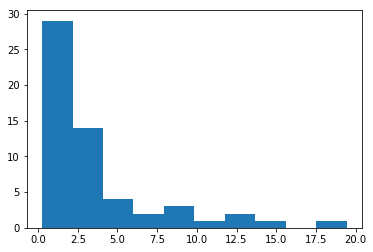

In [405]:
los = list(icustays.merge(patients, on='ICUSTAY_ID')['LOS'])
plt.hist(los)
print(np.mean(los))
print(los)